<a href="https://colab.research.google.com/github/saif9402/Dr-Wessam-Project/blob/main/feature_extraction_word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marnunaatef","key":"ee2ced2020c7862bac116bfd08a12486"}'}

In [ ]:
import os
import zipfile

# Create kaggle directory and move kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json



In [ ]:
!kaggle datasets download -d anupampaul005/fake-news-dataset


Dataset URL: https://www.kaggle.com/datasets/anupampaul005/fake-news-dataset
License(s): MIT
  0% 0.00/80.4M [00:00<?, ?B/s]
100% 80.4M/80.4M [00:00<00:00, 1.41GB/s]


In [ ]:
with zipfile.ZipFile("fake-news-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("fake_news")


In [ ]:
import pandas as pd

df = pd.read_csv("fake_news/dataset.csv")  # Update filename if different
df.head()


,title,text,unreliable,author
0,WARNING: A Pivotal Moment For The Stock Market...,WARNING: A Pivotal Moment For The Stock Market...,1,Anonymous Coward (UID 72071746)
1,"Trump, top defense officials, discuss North Ko...",WASHINGTON - U.S. President Donald Trump met ...,0,Unknown
2,British civil servants' union calls nationwide...,LONDON - British civil servants will vote nex...,0,Unknown
3,A**hole Of The Day – Michele Bachmann: Muslim...,Michele Bachmann has been pretty quiet since l...,1,Unknown
4,’Deport Fat People’ Posters Appear At CU Bould...,Posters calling on Donald Trump to “Deport Fat...,0,Lucas Nolan


In [ ]:
df['content'] = df['title'].fillna('') + ' ' + df['text'].fillna('')


In [ ]:
df['label'] = df['unreliable']

# Check result
print(df[['title', 'text', 'content', 'label']].head())

                                               title  \
0  WARNING: A Pivotal Moment For The Stock Market...   
1  Trump, top defense officials, discuss North Ko...   
2  British civil servants' union calls nationwide...   
3   A**hole Of The Day – Michele Bachmann: Muslim...   
4  ’Deport Fat People’ Posters Appear At CU Bould...   

                                                text  \
0  WARNING: A Pivotal Moment For The Stock Market...   
1  WASHINGTON  - U.S. President Donald Trump met ...   
2  LONDON  - British civil servants will vote nex...   
3  Michele Bachmann has been pretty quiet since l...   
4  Posters calling on Donald Trump to “Deport Fat...   

                                             content  label  
0  WARNING: A Pivotal Moment For The Stock Market...      1  
1  Trump, top defense officials, discuss North Ko...      0  
2  British civil servants' union calls nationwide...      0  
3   A**hole Of The Day – Michele Bachmann: Muslim...      1  
4  ’Deport Fat P

In [ ]:
import re, string, nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r'\d+', '', text)
    words = [w for w in text.split() if w not in stop_words]
    words = [lemmatizer.lemmatize(w) for w in words]
    return ' '.join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df['cleaned_content'] = df['content'].apply(preprocess)

#  STEP 9: Remove short documents (<5 words)
df = df[df['cleaned_content'].str.split().str.len() > 5]

In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding


In [ ]:
#STEP 1: Tokenization

# tokenizer without limiting vocab size yet
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_content'])

# Get total number of unique words
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1  # +1 for padding token (or OOV token)

print("Total unique words (vocab size):", vocab_size)

print("Tokenization completed.")
print(f"Total unique words in word_index: {word_index}")
print(" Word Index Mapping (First 10 words):")
for word, index in list(tokenizer.word_index.items())[:10]:
    print(f"{word}: {index}")


In [ ]:
# Text to sequences
sequences = tokenizer.texts_to_sequences(df['cleaned_content'])

print("\n Tokenized Sequence (Example):")
print(sequences[0])
print("max length")
max(len(data) for data in df['cleaned_content'])

# Padding text

padded_seq = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')


print("\n Padded Sequence (Example):")
print(padded_seq[0])
print("Length of padded sequence:", len(padded_seq[0]))



 Tokenized Sequence (Example):
[1172, 6932, 625, 1338, 372, 47, 1172, 6932, 625, 1338, 372, 47, 676, 2147, 155, 152, 642, 23147, 1407, 23507, 2187, 7023, 1886, 147, 7895, 23147, 679, 2665, 5778, 5998, 29278]
max length

 Padded Sequence (Example):
[ 1172  6932   625  1338   372    47  1172  6932   625  1338   372    47
   676  2147   155   152   642 23147  1407 23507  2187  7023  1886   147
  7895 23147   679  2665  5778  5998 29278     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0   

In [ ]:
#  Prepare labels
y = df['label'].values
x = padded_seq

In [ ]:
#  Train/Test Split

from sklearn.model_selection import train_test_split



X_train_val, X_test, y_train_val, y_test = train_test_split(x ,y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=42)


print("\n Data split completed.")
print(f"Training samples: {padded_seq.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")



 Data split completed.
Training samples: 65539
Validation samples: 6554
Testing samples: 6554


In [ ]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    # Predictions & probabilities
    probs = model.predict_proba(X_test)[:, 1]
    preds = model.predict(X_test)

    # Metrics
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = auc(fpr, tpr)

    # Print results
    print(f"\n {name} Evaluation Metrics:")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC Score: {auc_score:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.title(f' Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")
    return fpr, tpr, auc_score, name


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:15:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBoost Evaluation Metrics:
Training Accuracy: 0.9340
Testing Accuracy: 0.8602
Accuracy: 0.8602
Precision: 0.8316
Recall: 0.9053
F1 Score: 0.8669
AUC Score: 0.9367


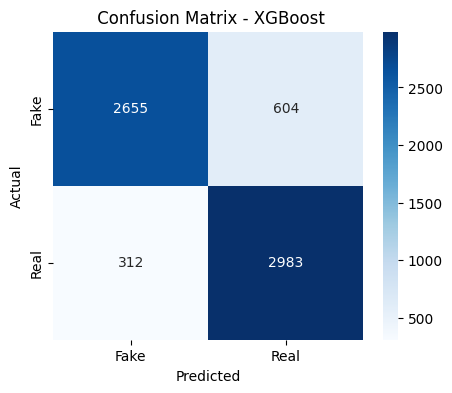

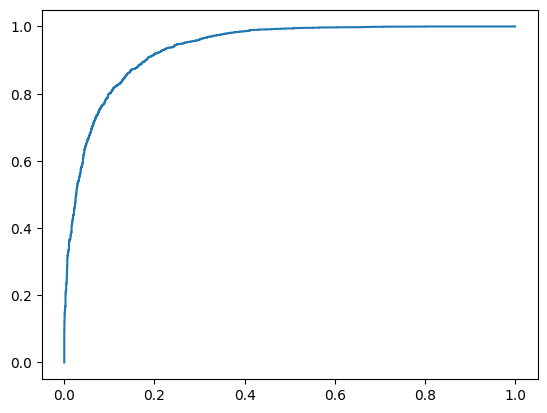

In [ ]:
roc_data = []
#xgboost
import xgboost as xgb
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
roc_data.append(evaluate_model("XGBoost", model, X_train, y_train, X_test, y_test))



 Random Forest Evaluation Metrics:
Training Accuracy: 0.8104
Testing Accuracy: 0.7431
Accuracy: 0.7431
Precision: 0.6916
Recall: 0.8825
F1 Score: 0.7755
AUC Score: 0.8389


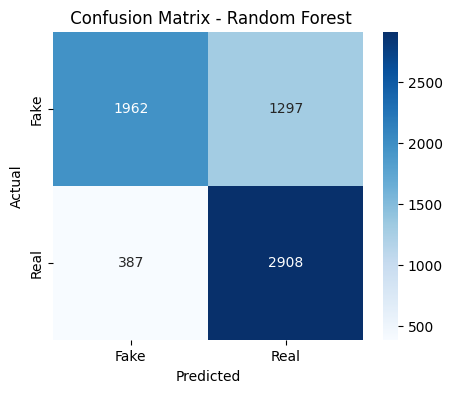

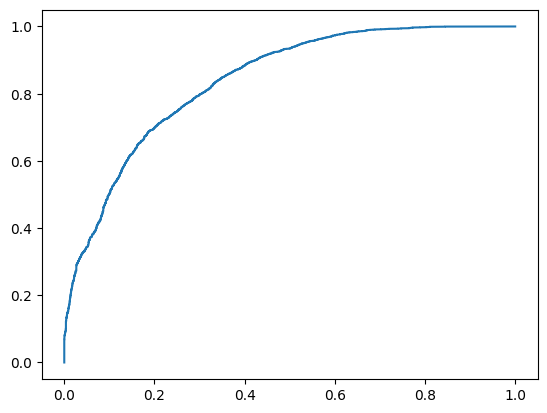

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=200,max_depth=15, min_samples_split=15, max_features='sqrt', min_samples_leaf=10,random_state=42)
rf_model.fit(X_train, y_train)
roc_data.append(evaluate_model("Random Forest", rf_model, X_train, y_train, X_test, y_test))



 Gradient Boosting Evaluation Metrics:
Training Accuracy: 0.8472
Testing Accuracy: 0.8099
Accuracy: 0.8099
Precision: 0.7711
Recall: 0.8844
F1 Score: 0.8239
AUC Score: 0.8980


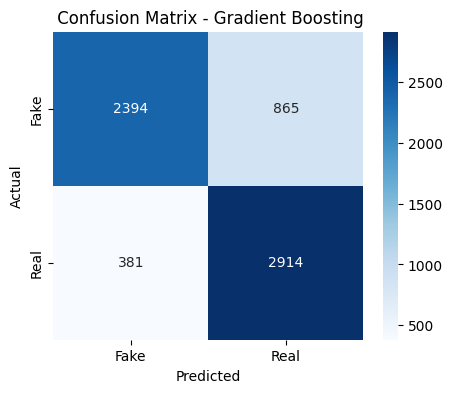

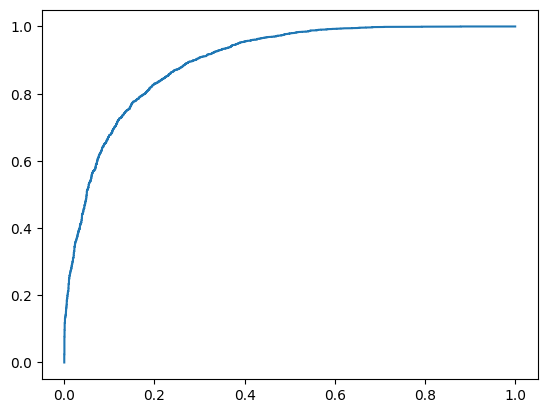

In [ ]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)
roc_data.append(evaluate_model("Gradient Boosting", gb_model, X_train, y_train, X_test, y_test))

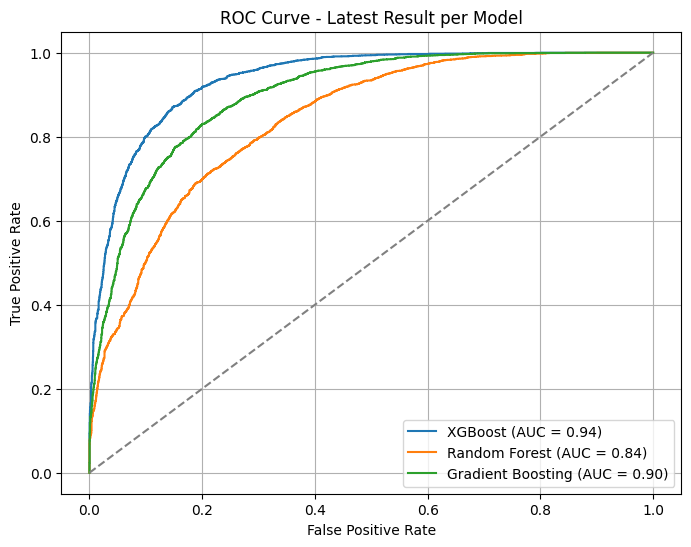

In [ ]:
# Plot all ROC curves
latest_results = {}

for fpr, tpr, auc_score, label in roc_data:
    latest_results[label] = (fpr, tpr, auc_score)

plt.figure(figsize=(8, 6))

for label, (fpr, tpr, auc_score) in latest_results.items():
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc_score:.2f})")

# Plot diagonal line for random guess
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Latest Result per Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:

from tensorflow.keras.optimizers import Adam


In [ ]:
vocab_size = 5000
embedding_dim = 64
max_length = 100

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.build(input_shape=(None, max_length))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353,089 (1.35 MB)

 Trainable params: 353,089 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
   X_train, y_train,
    validation_data=( X_val , y_val),
    epochs=5,
    batch_size=64
)



Epoch 1/5
820/820 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7146 - loss: 0.5453 - val_accuracy: 0.6561 - val_loss: 0.7603
Epoch 2/5
820/820 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7375 - loss: 0.5459 - val_accuracy: 0.8679 - val_loss: 0.3131
Epoch 3/5
820/820 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7949 - loss: 0.4683 - val_accuracy: 0.8200 - val_loss: 0.4421
Epoch 4/5
820/820 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8422 - loss: 0.3871 - val_accuracy: 0.8882 - val_loss: 0.3161
Epoch 5/5
820/820 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8863 - loss: 0.3134 - val_accuracy: 0.8451 - val_loss: 0.3727


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt


def evaluate_dl_model(name, model, X_train, y_train, X_test, y_test, history):
    # Predict probabilities and labels
    probs = model.predict(X_test).flatten()
    preds = (probs > 0.5).astype(int)

    # Metrics
    loss, test_acc = model.evaluate(X_test, y_test)
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # Print evaluation
    print(f"\n {name} Model Evaluation:")
    print(f"Training Accuracy (Last Epoch): {train_acc:.4f}")
    print(f"Testing Accuracy (Keras Eval): {test_acc:.4f}")
    print(f"Accuracy (Sklearn): {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC Score: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.title(f' Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8397 - loss: 0.3816

 LSTM Model Evaluation:
Training Accuracy (Last Epoch): 0.8728
Testing Accuracy (Keras Eval): 0.8366
Accuracy (Sklearn): 0.8366
Precision: 0.9303
Recall: 0.7296
F1 Score: 0.8178
AUC Score: 0.8982


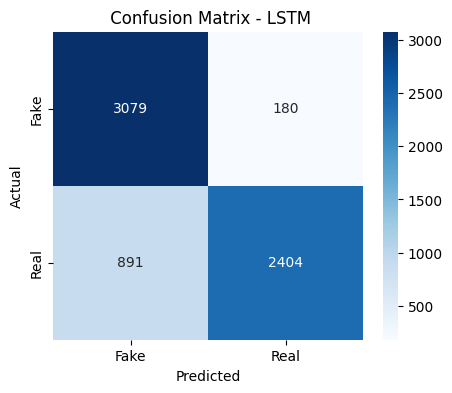

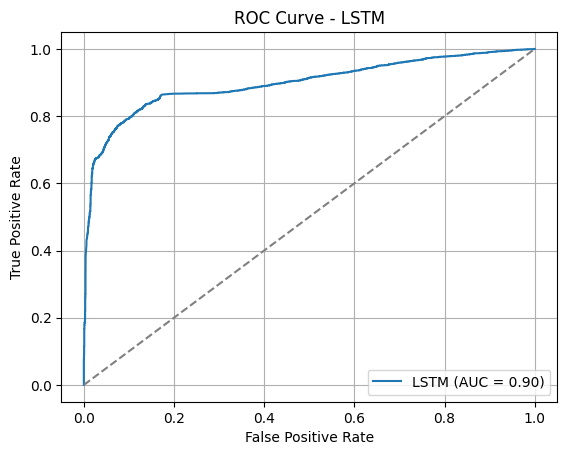

In [ ]:
evaluate_dl_model("LSTM", model, X_train, y_train, X_test, y_test , history)
